# Calculating Polyspectra from Dataset

Datasets in the hdf5 file format can be used as input when passing the location of the file, group key , and name of the dataset when creating the `Spectrum` object

In [2]:
import signalsnap as snp

In [3]:
path = 'example_data/measurement.h5'
group_key = 'day1'
data_set = 'measurement1'
f_unit = 'kHz'
spec = snp.Spectrum(path, group_key, data_set, f_unit=f_unit)

After creating a `Spectrum` instance, we only have to define the window size of the fourier transform and the number of
parts $m$ use estimate the cumulant. (see paper) The backend used for the calculation can also be defined, see docs. 
Here we use **opencl** for an AMD graphics card (**cuda** for NVidia). The first parameter of the calc_spec function corresponds to the
order of the spectrum. Let's calculate all orders up to 4.

Actual T_window: 50.00005000005
Maximum frequency: 124.999875
Number of points: 101


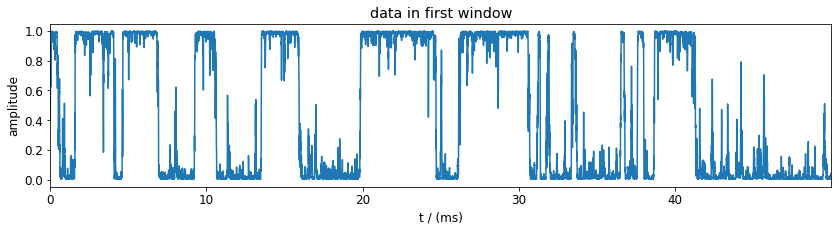

chunk shape:  12500


In [4]:
f_max = 2  # in kHz since data is in ms
T_window = 50 # ms
m = 5
f, s, serror = spec.calc_spec(order_in=[2, 3, 4], backend='opencl', T_window=T_window, f_max=f_max, m=m)

Now, we are going to plot all spectra. In the power spectrum (S2) also the error bands are shown (1-5 standard deviations). The errors of the two-dimensional
higher-order spectra are visualized be overlaying a green color on the spectral contributions which deviate from
zero less than a certain number of standard deviations.

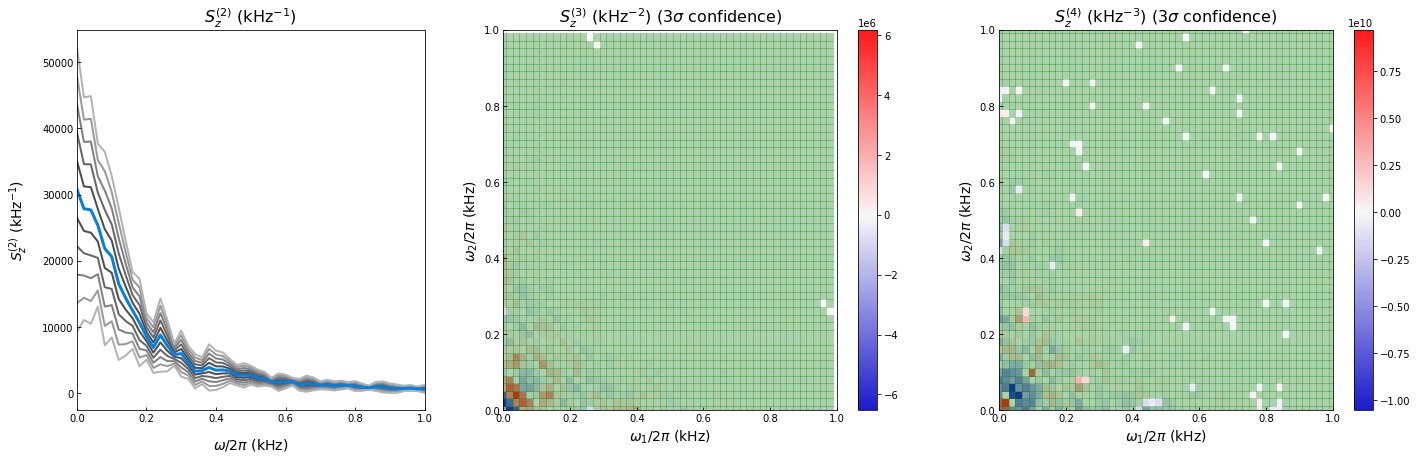

In [6]:
fig = spec.plot(f_max=f_max/2, sigma=3)